# Smart Housing Advisor
Tri Blankley and Kassidy Maberry

2025/05/06

Data provided by Redfin, a national real estate brokerage.

Link: https://www.redfin.com/news/data-center

In [9]:
import pandas as pd
import matplotlib.pyplot as mlp
import seaborn as sb
# Import plotly

"""
Loads plot data.
"""
def load_data():
    d = pd.read_csv("city_market_tracker.tsv000", sep="\t")
    d["PERIOD_BEGIN"] = pd.to_datetime(d["PERIOD_BEGIN"])
    d["PERIOD_END"] = pd.to_datetime(d["PERIOD_END"])
    # TODO: Convert dates into datatime.
    return d

data = load_data()
print("Data has loaded")

Data has loaded


In [9]:
print(data.keys())

Index(['PERIOD_BEGIN', 'PERIOD_END', 'PERIOD_DURATION', 'REGION_TYPE',
       'REGION_TYPE_ID', 'TABLE_ID', 'IS_SEASONALLY_ADJUSTED', 'REGION',
       'CITY', 'STATE', 'STATE_CODE', 'PROPERTY_TYPE', 'PROPERTY_TYPE_ID',
       'MEDIAN_SALE_PRICE', 'MEDIAN_SALE_PRICE_MOM', 'MEDIAN_SALE_PRICE_YOY',
       'MEDIAN_LIST_PRICE', 'MEDIAN_LIST_PRICE_MOM', 'MEDIAN_LIST_PRICE_YOY',
       'MEDIAN_PPSF', 'MEDIAN_PPSF_MOM', 'MEDIAN_PPSF_YOY', 'MEDIAN_LIST_PPSF',
       'MEDIAN_LIST_PPSF_MOM', 'MEDIAN_LIST_PPSF_YOY', 'HOMES_SOLD',
       'HOMES_SOLD_MOM', 'HOMES_SOLD_YOY', 'PENDING_SALES',
       'PENDING_SALES_MOM', 'PENDING_SALES_YOY', 'NEW_LISTINGS',
       'NEW_LISTINGS_MOM', 'NEW_LISTINGS_YOY', 'INVENTORY', 'INVENTORY_MOM',
       'INVENTORY_YOY', 'MONTHS_OF_SUPPLY', 'MONTHS_OF_SUPPLY_MOM',
       'MONTHS_OF_SUPPLY_YOY', 'MEDIAN_DOM', 'MEDIAN_DOM_MOM',
       'MEDIAN_DOM_YOY', 'AVG_SALE_TO_LIST', 'AVG_SALE_TO_LIST_MOM',
       'AVG_SALE_TO_LIST_YOY', 'SOLD_ABOVE_LIST', 'SOLD_ABOVE_LIST_MOM',
 

# Task 1: User Input

In [1]:
income = float(input("Enter your annual income: "))
downPay = float(input("Enter your down payment: "))
prefered = input("Enter your prefered city (optional): ")

Enter your annual income:  100000
Enter your down payment:  2000
Enter your prefered city (optional):  a


# Task 2: Affordability Estimation

In [11]:
monthlyBudget = (income * .3)/12
loanDur = int(input("Enter a loan duration in months: "))
houseBudget = downPay + monthlyBudget * loanDur
out = data[data["MEDIAN_SALE_PRICE"] <= houseBudget]
out = out[["MEDIAN_SALE_PRICE", "CITY"]]
print("You can afford houses from the following cities.")
print(out)

Enter a loan duration in months:  10


27000.0
         MEDIAN_SALE_PRICE             CITY
107                20000.0  Cedar Glen West
108                19109.0       Hagerstown
110                20000.0    Fairmont City
133                20900.0    Crystal Lakes
222                12500.0          Waverly
...                    ...              ...
5818185            18132.0     Moline Acres
5818299            25900.0          Hubbell
5818322            15000.0          Denison
5818481             9387.5       Lindenwold
5818656            18000.0     Sylvan Beach

[83990 rows x 2 columns]


# Task 3: Market Trend Analysis

Enter your prefered city (optional):  Chicago


/tmp/ipykernel_283998/713840067.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market["PERIOD_YEAR"] = market["PERIOD_BEGIN"].dt.year
/tmp/ipykernel_283998/713840067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market["PERIOD_MONTH"] = market["PERIOD_BEGIN"].dt.month


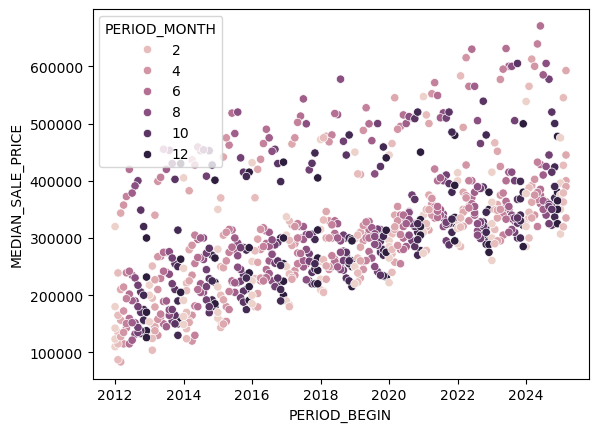

In [45]:
city = input("Enter your prefered city (optional): ")
market = data[data["CITY"] == city]

# TODO: Fix copy warning
market["PERIOD_YEAR"] = market["PERIOD_BEGIN"].dt.year
market["PERIOD_MONTH"] = market["PERIOD_BEGIN"].dt.month
sb.scatterplot(market, x="PERIOD_BEGIN", y="MEDIAN_SALE_PRICE", hue="PERIOD_MONTH")
mlp.show()

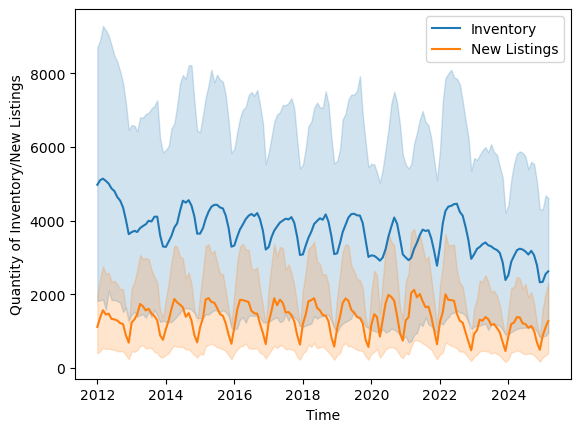

In [46]:
sb.lineplot(market, x="PERIOD_BEGIN", y="INVENTORY", label="Inventory")
sb.lineplot(market, x="PERIOD_BEGIN", y="NEW_LISTINGS", label="New Listings")
mlp.ylabel("Quantity of Inventory/New Listings")
mlp.xlabel("Time")
mlp.show()

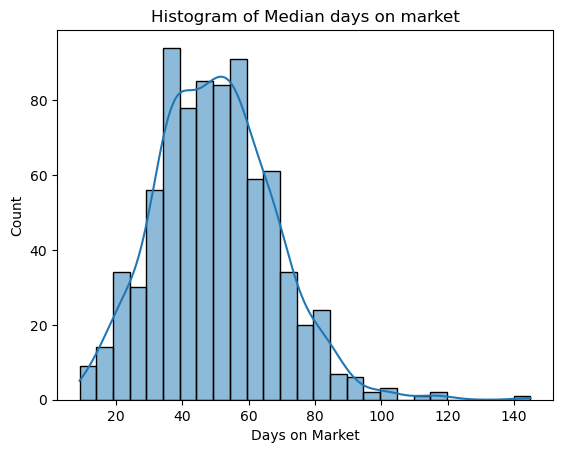

In [44]:
sb.histplot(market, x="MEDIAN_DOM", kde=True)
mlp.title("Histogram of Median days on market")
mlp.xlabel("Days on Market")
mlp.show()

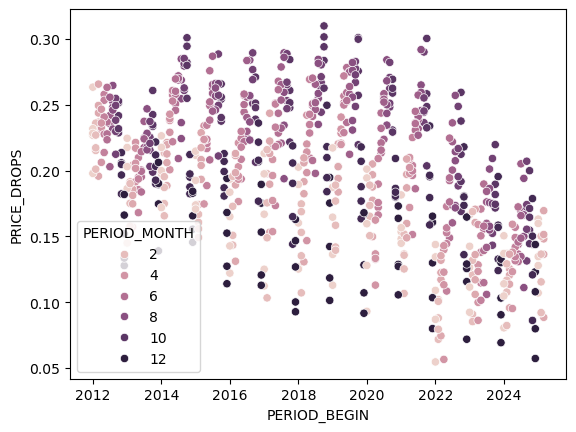

In [31]:
sb.scatterplot(market, x="PERIOD_BEGIN", y="PRICE_DROPS", hue="PERIOD_MONTH")
mlp.show()

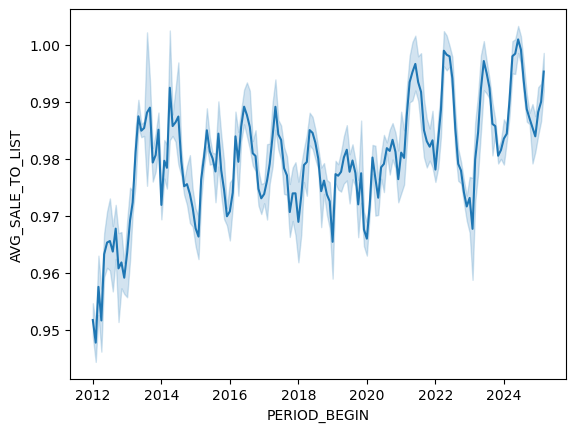

In [43]:
sb.lineplot(market, x="PERIOD_BEGIN", y="AVG_SALE_TO_LIST")
mlp.show()

# Task 4: Generate Insights

In [ ]:
print("Your estimated house budget is", houseBudget)

# List of cities matching this budget.

# Where to buy and not buy.